In [1]:
import torch
from torch.autograd import Variable

In [2]:
y = torch.rand(5, 3)
print(torch.cuda.is_available())
y

False



 0.9829  0.5952  0.2644
 0.5827  0.9950  0.6859
 0.5402  0.2441  0.6880
 0.0269  0.3166  0.4145
 0.9137  0.7390  0.7221
[torch.FloatTensor of size 5x3]

In [ ]:
y_cuda = y.cuda()

In [2]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [6]:
y = x + 2

In [ ]:
dir(y.grad_fn)

In [47]:
z = y * y

In [48]:
z

Variable containing:
 9  9
 9  9
[torch.FloatTensor of size 2x2]

In [45]:
y.grad_fn.next_functions

((<AccumulateGrad at 0x104e6ac50>, 0),)

In [56]:
out = z.mean()
out.backward()

In [75]:
print(x.grad)

Variable containing:
 1.5000  1.5000
 1.5000  1.5000
[torch.FloatTensor of size 2x2]



In [ ]:
x.zero_grad()

In [68]:
y.grad_fn.register_hook

<function AddBackward0.register_hook>

In [19]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [20]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [21]:
params = list(net.parameters())

In [23]:
import torchvision.models as models
vgg16 = models.vgg16(pretrained=True)

In [25]:
vgg16.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1

In [30]:
vgg16.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [8]:
from torchviz import make_dot

In [114]:
inputs = torch.rand(1,3,224,224)
y = model(torch.autograd.Variable(inputs))
print(y)

Variable containing:
-0.7523  1.5664 -0.1663  ...  -2.2150  0.9158  1.4344
[torch.FloatTensor of size 1x1000]



In [116]:
print

torch.autograd.variable.Variable

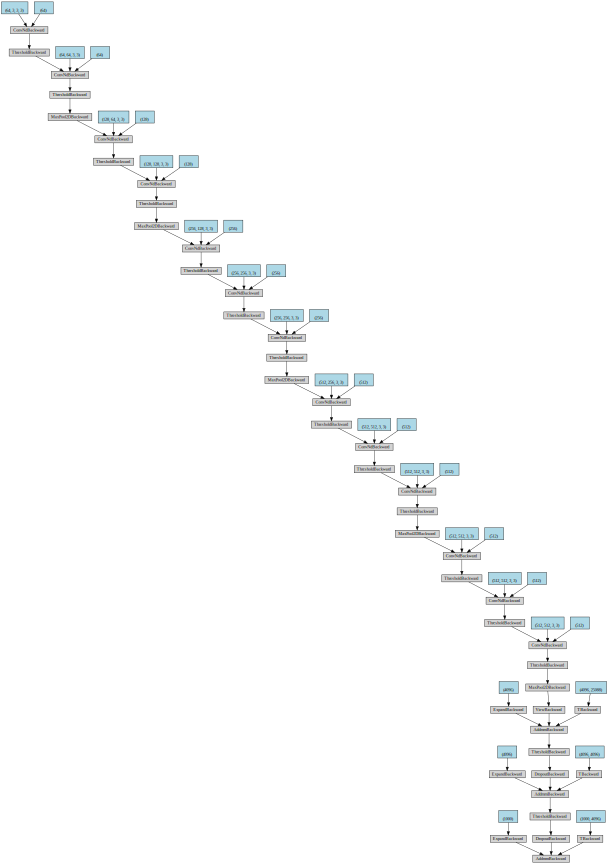

In [88]:
g = make_dot(y)
g

In [89]:
import numpy as np
import six

def generate_anchor_base(base_size=16, ratios=[0.5, 1, 2],
                         anchor_scales=[8, 16, 32]):
    """Generate anchor base windows by enumerating aspect ratio and scales.

    Generate anchors that are scaled and modified to the given aspect ratios.
    Area of a scaled anchor is preserved when modifying to the given aspect
    ratio.

    :obj:`R = len(ratios) * len(anchor_scales)` anchors are generated by this
    function.
    The :obj:`i * len(anchor_scales) + j` th anchor corresponds to an anchor
    generated by :obj:`ratios[i]` and :obj:`anchor_scales[j]`.

    For example, if the scale is :math:`8` and the ratio is :math:`0.25`,
    the width and the height of the base window will be stretched by :math:`8`.
    For modifying the anchor to the given aspect ratio,
    the height is halved and the width is doubled.

    Args:
        base_size (number): The width and the height of the reference window.
        ratios (list of floats): This is ratios of width to height of
            the anchors.
        anchor_scales (list of numbers): This is areas of anchors.
            Those areas will be the product of the square of an element in
            :obj:`anchor_scales` and the original area of the reference
            window.

    Returns:
        ~numpy.ndarray:
        An array of shape :math:`(R, 4)`.
        Each element is a set of coordinates of a bounding box.
        The second axis corresponds to
        :math:`(y_{min}, x_{min}, y_{max}, x_{max})` of a bounding box.

    """
    py = base_size / 2.
    px = base_size / 2.

    anchor_base = np.zeros((len(ratios) * len(anchor_scales), 4),
                           dtype=np.float32)
    for i in six.moves.range(len(ratios)):
        for j in six.moves.range(len(anchor_scales)):
            h = base_size * anchor_scales[j] * np.sqrt(ratios[i])
            w = base_size * anchor_scales[j] * np.sqrt(1. / ratios[i])

            index = i * len(anchor_scales) + j
            anchor_base[index, 0] = py - h / 2.
            anchor_base[index, 1] = px - w / 2.
            anchor_base[index, 2] = py + h / 2.
            anchor_base[index, 3] = px + w / 2.
    return anchor_base

def _enumerate_shifted_anchor(anchor_base, feat_stride, height, width):
    # Enumerate all shifted anchors:
    #
    # add A anchors (1, A, 4) to
    # cell K shifts (K, 1, 4) to get
    # shift anchors (K, A, 4)
    # reshape to (K*A, 4) shifted anchors
    # return (K*A, 4)

    # !TODO: add support for torch.CudaTensor
    # xp = cuda.get_array_module(anchor_base)
    # it seems that it can't be boosed using GPU
    import numpy as xp
    shift_y = xp.arange(0, height * feat_stride, feat_stride)
    shift_x = xp.arange(0, width * feat_stride, feat_stride)
    shift_x, shift_y = xp.meshgrid(shift_x, shift_y)
    shift = xp.stack((shift_y.ravel(), shift_x.ravel(),
                      shift_y.ravel(), shift_x.ravel()), axis=1)

    A = anchor_base.shape[0]
    K = shift.shape[0]
    anchor = anchor_base.reshape((1, A, 4)) +\
        shift.reshape((1, K, 4)).transpose((1, 0, 2))
    anchor = anchor.reshape((K * A, 4)).astype(np.float32)
    return anchor

In [100]:
height, width, feat_stride = 120, 120, 16
shift_y = np.arange(0, height * feat_stride, feat_stride)
shift_x = np.arange(0, width * feat_stride, feat_stride)
shift_x, shift_y = np.meshgrid(shift_x, shift_y)

In [107]:
shift = np.stack((shift_y.ravel(), shift_x.ravel(),
                  shift_y.ravel(), shift_x.ravel()), axis=1)

In [112]:
shift

array([[   0,    0,    0,    0],
       [   0,   16,    0,   16],
       [   0,   32,    0,   32],
       ...,
       [1904, 1872, 1904, 1872],
       [1904, 1888, 1904, 1888],
       [1904, 1904, 1904, 1904]])

In [113]:
120 * 120

14400

In [97]:
anchor_base.shape[0] * 540 * 540 == anchor.shape[0]

True

In [118]:
anchor_base.shape

(9, 4)

In [1]:
import cv2

from faster_rcnn.pytorch.config import opt
from faster_rcnn.data.dataset import (
    Dataset, TestDataset,
    inverse_normalize
)

In [2]:
opt._state_dict()

{'caffe_pretrain': False,
 'caffe_pretrain_path': '/Users/wubai.zhou/Uber/kaggle/data/faster_rcnn/checkpoints/vgg16-caffe.pth',
 'data': 'voc',
 'debug_file': '/tmp/debugf',
 'env': 'faster-rcnn',
 'epoch': 14,
 'load_path': None,
 'lr': 0.001,
 'lr_decay': 0.1,
 'max_size': 1000,
 'min_size': 600,
 'num_workers': 8,
 'plot_every': 40,
 'port': 8097,
 'pretrained_model': 'vgg16',
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'test_num': 10000,
 'test_num_workers': 8,
 'use_adam': False,
 'use_chainer': False,
 'use_drop': False,
 'voc_data_dir': '/Users/wubai.zhou/Uber/kaggle/data/faster_rcnn/VOCdevkit/VOC2007/',
 'weight_decay': 0.0005}

In [3]:
dataset = Dataset(opt)

In [ ]:
import ipdb
result = ipdb.runcall(dataset.__getitem__, 0)

In [14]:
img, bbox, label, scale = dataset[0]

In [5]:
scale

1.6

In [7]:
def test(x):
    y = x + 5
    return y

In [25]:
import torch
from torch.utils.model_zoo import load_url

sd = load_url("https://download.pytorch.org/models/vgg16-397923af.pth")

In [27]:
sd.keys()

odict_keys(['features.0.weight', 'features.0.bias', 'features.2.weight', 'features.2.bias', 'features.5.weight', 'features.5.bias', 'features.7.weight', 'features.7.bias', 'features.10.weight', 'features.10.bias', 'features.12.weight', 'features.12.bias', 'features.14.weight', 'features.14.bias', 'features.17.weight', 'features.17.bias', 'features.19.weight', 'features.19.bias', 'features.21.weight', 'features.21.bias', 'features.24.weight', 'features.24.bias', 'features.26.weight', 'features.26.bias', 'features.28.weight', 'features.28.bias', 'classifier.0.weight', 'classifier.0.bias', 'classifier.3.weight', 'classifier.3.bias', 'classifier.6.weight', 'classifier.6.bias'])

In [28]:
import weakref
import gc

In [58]:
class MyObject(object):
    def my_method(self):
        print('my_method was called!')

obj = MyObject()

In [60]:
r = weakref.ref(obj)

In [63]:
dir(r)

['__call__',
 '__callback__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [64]:
gc.collect()
assert r() is obj

In [65]:
obj = 1

In [67]:
gc.collect()
r()

In [70]:
a = dict()

In [76]:
a = list
r = weakref.ref(a)

In [82]:
from collections import OrderedDict

In [83]:
a = OrderedDict()
hook = weakref.ref(a)

In [84]:
hook

<weakref at 0x11cdfdf48; to 'collections.OrderedDict' at 0x122aa7510>

In [89]:
class Foo(object):
  def __init__(self, val=2):
     self.val = val
  def __getstate__(self):
     print("I'm being pickled")
     self.val *= 2
     return self.__dict__
  def __setstate__(self, d):
     print("I'm being unpickled with these values:", d)
     self.__dict__ = d
     self.val *= 3

import pickle
f = Foo()
f_string = pickle.dumps(f)
f_new = pickle.loads(f_string)
f_new.val

I'm being pickled
I'm being unpickled with these values: {'val': 4}


12

In [91]:
f.__dict__

{'val': 4}

In [1]:
import torch
from torch import nn
from torch.autograd import Variable

In [2]:
model = nn.Sequential()
model.add_module('W0', nn.Linear(8, 16))
model.add_module('tanh', nn.Tanh())
model.add_module('W1', nn.Linear(16, 1))

x = Variable(torch.randn(1,8))
y = model(x)

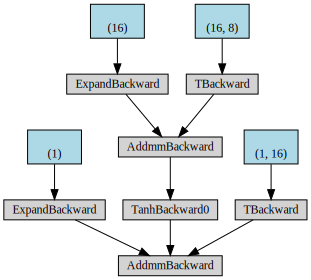

In [9]:
make_dot(y)

In [6]:
y.backward()

In [4]:
params = dict(model.named_parameters())
params

{'W0.bias': Parameter containing:
  0.2678
  0.1798
  0.2301
 -0.0821
 -0.2501
 -0.1029
  0.0855
  0.1733
  0.2618
  0.1745
  0.2736
  0.1128
  0.2810
 -0.1281
 -0.1551
 -0.0692
 [torch.FloatTensor of size 16], 'W0.weight': Parameter containing:
  0.1902 -0.1936 -0.1187 -0.1469  0.1217  0.0616 -0.0590  0.0910
 -0.1571 -0.2228 -0.1232 -0.2715 -0.1807  0.3440 -0.0945  0.3021
 -0.1107 -0.1826  0.2723  0.2448 -0.2204 -0.0772 -0.0716 -0.2851
  0.0081 -0.2319  0.2361  0.3480  0.0398  0.1990 -0.2567 -0.0409
 -0.3316  0.0989 -0.1815  0.0358  0.2884  0.2487  0.2513  0.2806
 -0.3082 -0.2733  0.0969 -0.0418  0.0357 -0.0235  0.1899  0.0673
  0.0063 -0.0751 -0.3439 -0.3221  0.1926 -0.0696  0.1353  0.1836
  0.1696  0.2086 -0.0781 -0.3000 -0.3464  0.0811  0.2424  0.1278
  0.1424 -0.0610  0.2278  0.0012  0.1693  0.2242  0.2380 -0.2863
 -0.2520  0.0622  0.2738 -0.2215 -0.2933 -0.2538 -0.2374 -0.1091
  0.3112 -0.2463 -0.2623 -0.2506  0.0725 -0.3141 -0.0081  0.1870
  0.2922 -0.3469  0.0169  0.2920  0.282

In [7]:
w0 = params['W0.weight']
w0.grad

Variable containing:
-0.0027 -0.0031 -0.0030 -0.0044 -0.0037  0.0020  0.0013  0.0016
-0.0483 -0.0546 -0.0536 -0.0790 -0.0660  0.0355  0.0234  0.0280
-0.1265 -0.1430 -0.1402 -0.2068 -0.1729  0.0930  0.0612  0.0734
-0.1117 -0.1263 -0.1238 -0.1825 -0.1526  0.0821  0.0540  0.0648
-0.0184 -0.0208 -0.0204 -0.0300 -0.0251  0.0135  0.0089  0.0107
 0.0286  0.0324  0.0317  0.0468  0.0391 -0.0210 -0.0138 -0.0166
 0.0023  0.0026  0.0025  0.0037  0.0031 -0.0017 -0.0011 -0.0013
 0.0766  0.0866  0.0850  0.1253  0.1047 -0.0563 -0.0370 -0.0444
 0.0087  0.0099  0.0097  0.0143  0.0119 -0.0064 -0.0042 -0.0051
 0.0668  0.0755  0.0740  0.1091  0.0913 -0.0491 -0.0323 -0.0387
 0.0968  0.1095  0.1073  0.1583  0.1323 -0.0712 -0.0468 -0.0561
-0.0396 -0.0448 -0.0440 -0.0648 -0.0542  0.0291  0.0192  0.0230
 0.0799  0.0903  0.0885  0.1305  0.1092 -0.0587 -0.0386 -0.0463
 0.0633  0.0715  0.0701  0.1034  0.0865 -0.0465 -0.0306 -0.0367
 0.0534  0.0604  0.0592  0.0873  0.0730 -0.0393 -0.0258 -0.0310
 0.1269  0.1435  0.

In [102]:
param_map = {id(v): k for k, v in params.items()}
param_map

{4779471000: 'W0.bias',
 4779472680: 'W0.weight',
 4779573480: 'W1.weight',
 4779573640: 'W1.bias'}

In [107]:
from torch.autograd import Function

In [154]:
dir(y.grad_fn)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_register_hook_dict',
 'next_functions',
 'register_hook',
 'requires_grad']

In [165]:
hasattr(y, 'grad')

True

In [11]:
y.grad_fn.num_inputs()

AttributeError: 'AddmmBackward' object has no attribute 'num_inputs'

In [10]:
nexts = y.grad_fn.next_functions
nexts

((<ExpandBackward at 0x10f7160b8>, 0),
 (<TanhBackward0 at 0x10f716a90>, 0),
 (<TBackward at 0x10f716a58>, 0))

In [210]:
expand_bf = nexts[0][0]
expand_bf.varible

AttributeError: 'ExpandBackward' object has no attribute 'varible'

In [12]:
accGrad = nexts[0][0].next_functions[0][0]
accGrad

In [17]:
accGrad.variable.grad_accumulator()

AttributeError: 'Parameter' object has no attribute 'grad_accumulator'

In [16]:
accGrad.variable

AttributeError: 'Parameter' object has no attribute 'accGrad'

In [163]:
hasattr(accGrad.variable, 'grad')

True

In [166]:
type(accGrad.register_hook)

builtin_function_or_method

In [173]:
import torch
from torch import nn
import torch.functional as F
from torch.autograd import Variable

def for_hook(module, input, output):
    print(module)
    for val in input:
        print("input val:",val)
    for out_val in output:
        print("output val:", out_val)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
    def forward(self, x):

        return x+1

model = Model()
x = Variable(torch.FloatTensor([1]), requires_grad=True)
handle = model.register_forward_hook(for_hook)
print(model(x))
handle.remove()
#model(x)

Model(
)
input val: Variable containing:
 1
[torch.FloatTensor of size 1]

output val: Variable containing:
 2
[torch.FloatTensor of size 1]

Variable containing:
 2
[torch.FloatTensor of size 1]



In [178]:
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.nn import Parameter
from torch.autograd import Function
import math
class _Linear(Function):

    # bias is an optional argument
    def forward(self, input, weight, bias=None):
        self.save_for_backward(input, weight, bias)
        output = input.mm(weight.t())
        if bias is not None:
            output += bias.unsqueeze(0).expand_as(output)
        return output

    def backward(self, grad_output):
        input, weight, bias = self.saved_tensors
        grad_input = grad_weight = grad_bias = None
        print("backwarding......")
        if self.needs_input_grad[0]:
            grad_input = grad_output.mm(weight)
        if self.needs_input_grad[1]:
            grad_weight = grad_output.t().mm(input)
        if bias is not None and self.needs_input_grad[2]:
            grad_bias = grad_output.sum(0).squeeze(0)

        return grad_input, grad_weight, grad_bias

def module_hook(module, grad_input, grad_out):
    print('module hook')
    print('grad_out', grad_out)

def variable_hook(grad):
    print('variable hook')
    print('grad', grad)
    return grad*.1

class Linear(nn.Module):

    def __init__(self, in_features, out_features, bias=True):
        super(Linear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.Tensor(out_features, in_features))
        if bias:
            self.bias = Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input):
        if self.bias is None:
            return _Linear()(input, self.weight)
        else:
            return _Linear()(input, self.weight, self.bias)
linear = Linear(3,1)
linear.register_backward_hook(module_hook)
value = Variable(torch.FloatTensor([[1,2,3]]), requires_grad=True)

res = linear(value)
res.register_hook(variable_hook)

res.backward()

variable hook
grad Variable containing:
 1
[torch.FloatTensor of size 1x1]

backwarding......
module hook
grad_out (Variable containing:
 0.1000
[torch.FloatTensor of size 1x1]
,)


In [40]:
from torch.autograd import Variable
from torch.utils import data as data_

from faster_rcnn.ctorch.config import opt
from faster_rcnn.data.dataset import (
    Dataset, TestDataset,
    # inverse_normalize
)

In [55]:
opt.voc_data_dir = '/Users/wubai.zhou/Uber/kaggle/data/faster_rcnn/VOCdevkit/VOC2007/'
dataset = Dataset(opt)
print('load data')
dataloader = data_.DataLoader(dataset,
                              batch_size=1,
                              shuffle=True,
                              # pin_memory=True,
                              num_workers=4)
testset = TestDataset(opt)
test_dataloader = data_.DataLoader(testset,
                                   batch_size=1,
                                   num_workers=4,
                                   # pin_memory=True,
                                   shuffle=False)

load data


In [63]:
type(test_dataloader)

torch.utils.data.dataloader.DataLoader

In [64]:
from tqdm import tqdm
imgs, sizes, gt_bboxes_, gt_labels_, gt_difficults_ = testset[0]

In [70]:
gt_bboxes_.shape

(2, 4)

In [83]:
from tqdm import tqdm
for ii, (imgs, sizes, gt_bboxes_, gt_labels_, gt_difficults_) in tqdm(enumerate(test_dataloader)):
    if ii == 0:
        break

0it [00:00, ?it/s]


In [85]:
import numpy as np
sizes

[
  500
 [torch.LongTensor of size 1], 
  353
 [torch.LongTensor of size 1]]